# Exploration of IMDb Movies

## Final Project (Brainstation Datascience)

### By: Nick Tiliakos    

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Removes warning alerts

import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [3]:
data = pd.read_csv('/Users/NickT/Documents/Brainstation DS/movies.csv')
df_old = pd.DataFrame(data)

In [4]:
df_sam = df_old.sample(n=4)
df_sam

,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,language,country,awards,lastupdated,type
6044,56703,The World's Greatest Sinner,1962,NaN,77 min,Drama,1962-06-01,Timothy Carey,Timothy Carey,"Timothy Carey, Gil Barreto, Betty Rowland, Jam...",...,7.0,487.0,NaN,A bored insurance salesman quits his job to go...,A bored insurance salesman quits his job to go...,English,USA,NaN,2015-08-26 01:00:23.870000000,movie
13452,92906,Dolls,1987,R,77 min,"Fantasy, Horror",1987-05-29,Stuart Gordon,Ed Naha,"Ian Patrick Williams, Carolyn Purdy-Gordon, Ca...",...,6.4,5586.0,https://m.media-amazon.com/images/M/MV5BMTgwNz...,A group of people stop by a mansion during a s...,A group of travelers spend the night in the ma...,English,"USA, Italy",1 win & 1 nomination.,2015-08-27 00:44:05.370000000,movie
693,21371,Show Girl in Hollywood,1930,UNRATED,80 min,"Comedy, Musical, Drama",1930-04-20,Mervyn LeRoy,"J.P. McEvoy (based on the story by), Harvey F....","Alice White, Jack Mulhall, Blanche Sweet, Ford...",...,7.0,113.0,https://m.media-amazon.com/images/M/MV5BMTk5Mj...,'Rainbow Girls' has just opened and closed on ...,'Rainbow Girls' has just opened and closed on ...,English,USA,NaN,2015-05-16 01:15:49.167000000,movie
37219,1733125,Dungeons & Dragons: The Book of Vile Darkness,2012,PG-13,90 min,"Adventure, Fantasy",2012-11-24,Gerry Lively,Brian Rudnick (screenplay),"Jack Derges, Anthony Howell, Eleanor Gecks, Do...",...,4.4,1596.0,https://m.media-amazon.com/images/M/MV5BMTY2Mj...,"Two thousand years ago, Nhagruul the Foul, a s...","Two thousand years ago, Nhagruul the Foul, a s...",English,"UK, Bulgaria",NaN,2015-08-31 00:43:44.090000000,movie


In [5]:
print(data.shape)

(46014, 21)


#### Deleting useless columns from the dataframe

In [6]:
df_new_1 = df_old.drop('lastupdated', 1)
df_new_2 = df_new_1.drop('imdbID', 1)
df = df_new_2.drop('poster', 1)

#### Columns after removal

In [7]:
for col in df.columns:
    print(col)

title
year
rating
runtime
genre
released
director
writer
cast
metacritic
imdbRating
imdbVotes
plot
fullplot
language
country
awards
type


#### Changing 'imdbRanking' column name to 'IMDb Ranking'

In [8]:
df = df.rename(columns = {'imdbRating': 'IMDb Rating'})

In [9]:
df.dtypes

title           object
year            object
rating          object
runtime         object
genre           object
released        object
director        object
writer          object
cast            object
metacritic     float64
IMDb Rating    float64
imdbVotes      float64
plot            object
fullplot        object
language        object
country         object
awards          object
type            object
dtype: object

In [10]:
df.describe()

,metacritic,IMDb Rating,imdbVotes
count,9401.000000,44300.000000,4.429900e+04
mean,56.896288,6.381454,1.180055e+04
std,17.715373,1.183113,4.934499e+04
min,1.000000,1.100000,5.000000e+00
25%,45.000000,5.800000,3.260000e+02
50%,58.000000,6.600000,9.990000e+02
75%,70.000000,7.200000,3.829000e+03
max,100.000000,9.600000,1.521105e+06


### Basic data cleaning

In [11]:
# Removes "min" string from runtime 

df['runtime'] = df['runtime'].str.replace('min', '')

In [12]:
# Removes NaN from 'runtime' column

df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df = df.fillna(0)

# Converts runtime values to str type
# df['runtime'] = df['runtime'].astype(str)

In [13]:
# Converts year column to float

df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [14]:
# Convert genre column to string
df['genre'] = df['genre'].astype(str)

In [15]:
# Deleting duplicates

df = df.drop([25677, 38074], 0)

# General Exploration

#### Heatmap Displaying Various Data

<AxesSubplot:>

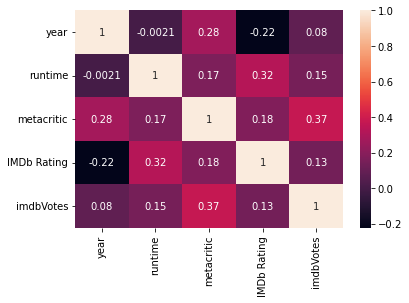

In [16]:
sns.heatmap(df.corr(), annot=True)

### 500 Longest Films Plot

In [17]:
# 500 Longest Films

long_movies = df.nlargest(500, 'runtime')
long_movies.head(n=3)

,title,year,rating,runtime,genre,released,director,writer,cast,metacritic,IMDb Rating,imdbVotes,plot,fullplot,language,country,awards,type
10985,Berlin Alexanderplatz,1980.0,NOT RATED,910.0,Drama,1983-08-10,0,0,"G�nter Lamprecht, Claus Holm, Hanna Schygulla,...",0.0,8.7,2859.0,"In late-1920s Berlin, Franz Biberkopf is relea...","This film, which is basically the longest narr...",German,"West Germany, Italy",5 wins & 1 nomination.,series
23972,Taken,2002.0,0,877.0,"Drama, Sci-Fi",2002-12-02,0,0,"Dakota Fanning, Matt Frewer, Emily Bergl, Heat...",0.0,7.9,16378.0,"Taken spans five decades and four generations,...","Taken spans five decades and four generations,...",English,USA,Nominated for 1 Golden Globe. Another 8 wins &...,series
8857,Semnadtsat mgnoveniy vesny,1973.0,0,840.0,"Adventure, Drama, History",1973-08-11,0,0,"Vyacheslav Tikhonov, Yefim Kopelyan, Leonid Br...",0.0,9.0,2386.0,"The series, based on a popular novel of the sa...","The series, based on a popular novel of the sa...",Russian,Soviet Union,0,series


In [18]:
# Dataframe without the 500 longest movies
df_no_long = pd.concat([df, long_movies]).drop_duplicates(keep=False)

df_run_mean = str(round(df_no_long['runtime'].mean(), 2))

df_long_run = round(long_movies['runtime'].mean(), 2)

print("Average runtime of all movies: ", df_run_mean, "minutes")
print("Average runtime of 500 longest movies: ", df_long_run, "minutes")

Average runtime of all movies:  89.7 minutes
Average runtime of 500 longest movies:  255.88 minutes


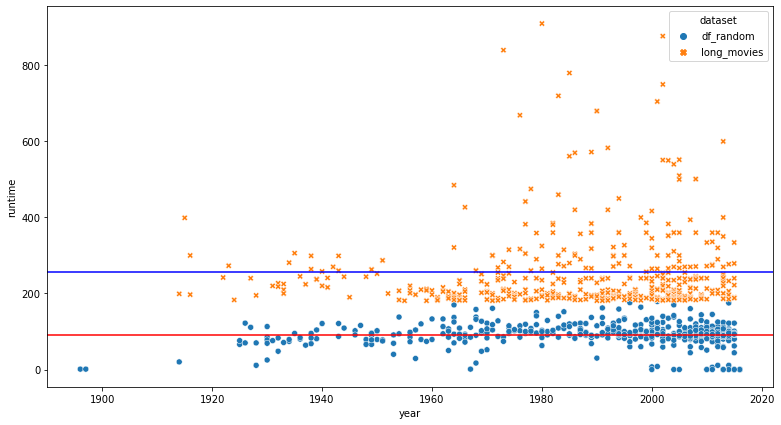

In [19]:
plt.figure(figsize=(13, 7))


df_random = df_no_long.sample(n=500)


concatenated = pd.concat([df_random.assign(dataset='df_random'), 
                          long_movies.assign(dataset='long_movies')])

sns.scatterplot(x='year', y='runtime', data=concatenated, 
                hue='dataset', style='dataset', sizes=(20, 200), 
                legend='full')

long_mov_mean = long_movies['runtime'].mean()
df_random_mean = df_random['runtime'].mean()

plt.axhline(y=df_random_mean, linewidth=1.5, color='red')
plt.axhline(y=long_mov_mean, linewidth=1.5, color='blue')

plt.show()

The plot above shows the runtimes of the 500 longest movies (orange markers) and the runtimes of 500 random movies (blue markers).

The blue line is the average runtime of the 500 longest movies and the red line is the average runtime of the 500 random movies

### Year of Release Distribution Plot

This distribution plot shows that as time went on, more movies were getting released each year.

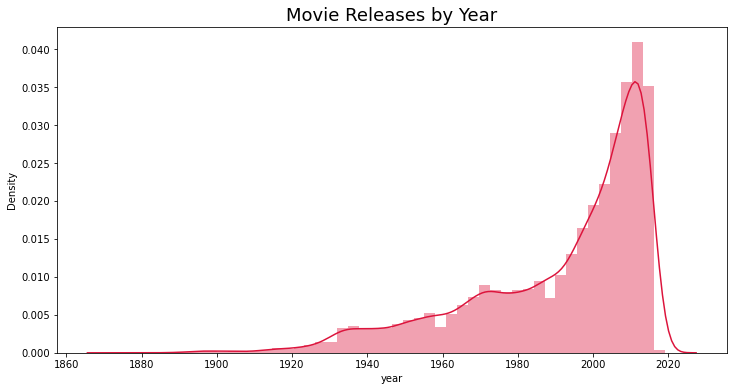

In [20]:
plt.figure(figsize=(12, 6))

sns.distplot(df['year'], color = 'crimson')
plt.title('Movie Releases by Year', fontsize=18)

plt.show()

### Movie Exploration by Genre

In [21]:
# Random dataset 
gen = df.sample(n=25000)

In [22]:
# Action dataframe
action_movies = gen[gen.genre.str.contains('Action')]
action_movies.head(n=3)

,title,year,rating,runtime,genre,released,director,writer,cast,metacritic,IMDb Rating,imdbVotes,plot,fullplot,language,country,awards,type
8743,All the Way Boys,1972.0,PG,105.0,"Action, Adventure, Comedy",1973-06-01,Giuseppe Colizzi,"Barbara Alberti, Giuseppe Colizzi, Amedeo Pagani","Terence Hill, Bud Spencer, Reinhard Kolldehoff...",0.0,6.7,3787.0,"The ""Trinity"" crew makes another modern era fi...","The ""Trinity"" crew makes another modern era fi...",Italian,Italy,2 wins.,movie
27850,Last Rites,2006.0,R,90.0,"Action, Horror, Sci-Fi",2007-05-01,Duane Stinnett,"Duane Stinnett (screenplay), Krissann Shipley ...","Noel Gugliemi, Howard Alonzo, Ethan Ednee, Rya...",0.0,3.5,810.0,"In Los Angeles, a meteor bringing some sort of...","In Los Angeles, a meteor bringing some sort of...",English,USA,0,movie
28766,Tower Heist,2011.0,PG-13,104.0,"Action, Comedy, Crime",2011-11-04,Brett Ratner,"Adam Cooper (story), Bill Collage (story), Ted...","Ben Stiller, Eddie Murphy, Casey Affleck, Alan...",59.0,6.2,103304.0,When a group of hard-working guys find out the...,Josh Kovaks is the manager of a high-rise cond...,"English, Spanish, Chinese",USA,2 nominations.,movie


In [77]:
# Comedy dataframe
com_movies = gen[gen.genre.str.contains('Comedy')]
com_movies.head(n=3)

,title,year,rating,runtime,genre,released,director,writer,cast,metacritic,IMDb Rating,imdbVotes,plot,fullplot,language,country,awards,type
16793,Eddie Izzard: Unrepeatable,1994.0,0,75.0,Comedy,0,John Gordillo,Eddie Izzard,Eddie Izzard,0.0,8.1,1245.0,Recorded at the Albery Theatre in March of 199...,Recorded at the Albery Theatre in March of 199...,English,UK,0,movie
8743,All the Way Boys,1972.0,PG,105.0,"Action, Adventure, Comedy",1973-06-01,Giuseppe Colizzi,"Barbara Alberti, Giuseppe Colizzi, Amedeo Pagani","Terence Hill, Bud Spencer, Reinhard Kolldehoff...",0.0,6.7,3787.0,"The ""Trinity"" crew makes another modern era fi...","The ""Trinity"" crew makes another modern era fi...",Italian,Italy,2 wins.,movie
28766,Tower Heist,2011.0,PG-13,104.0,"Action, Comedy, Crime",2011-11-04,Brett Ratner,"Adam Cooper (story), Bill Collage (story), Ted...","Ben Stiller, Eddie Murphy, Casey Affleck, Alan...",59.0,6.2,103304.0,When a group of hard-working guys find out the...,Josh Kovaks is the manager of a high-rise cond...,"English, Spanish, Chinese",USA,2 nominations.,movie


In [23]:
# Drama dataframe
drama_movies = gen[gen.genre.str.contains('Drama')]
drama_movies.head(n=3)

,title,year,rating,runtime,genre,released,director,writer,cast,metacritic,IMDb Rating,imdbVotes,plot,fullplot,language,country,awards,type
41274,The Keeping Room,2014.0,R,95.0,Drama,2015-09-25,Daniel Barber,Julia Hart,"Brit Marling, Hailee Steinfeld, Muna Otaru, Sa...",62.0,7.1,246.0,Left without men in the dying days of the Amer...,Left without men in the dying days of the Amer...,English,USA,3 nominations.,movie
37285,Jersey Boys,2014.0,R,134.0,"Biography, Drama, Music",2014-06-20,Clint Eastwood,"Marshall Brickman (screenplay), Rick Elice (sc...","Vincent Piazza, John Lloyd Young, Steve Schirr...",54.0,6.9,22104.0,The story of four young men from the wrong sid...,Jersey Boys is a musical biography of the Four...,English,USA,2 nominations.,movie
38236,Newlyweds,2011.0,NOT RATED,95.0,"Comedy, Drama",2011-12-26,Edward Burns,Edward Burns,"Edward Burns, Kerry Bish�, Marsha Dietlein, Ca...",0.0,6.3,1313.0,Newlyweds Buzzy and Katie find their blissful ...,Newlyweds Buzzy and Katie find their blissful ...,English,USA,0,movie


In [24]:
# Crime dataframe 
crime_movies = gen[gen.genre.str.contains('Crime')]
crime_movies.head(n=3)

,title,year,rating,runtime,genre,released,director,writer,cast,metacritic,IMDb Rating,imdbVotes,plot,fullplot,language,country,awards,type
28766,Tower Heist,2011.0,PG-13,104.0,"Action, Comedy, Crime",2011-11-04,Brett Ratner,"Adam Cooper (story), Bill Collage (story), Ted...","Ben Stiller, Eddie Murphy, Casey Affleck, Alan...",59.0,6.2,103304.0,When a group of hard-working guys find out the...,Josh Kovaks is the manager of a high-rise cond...,"English, Spanish, Chinese",USA,2 nominations.,movie
14772,I Love You to Death,1990.0,R,97.0,"Comedy, Crime",1990-04-06,Lawrence Kasdan,John Kostmayer,"Kevin Kline, Tracey Ullman, Joan Plowright, Ri...",45.0,6.4,10512.0,"Joey owns a pizza parlor, and is married to Ro...",Joey works with Rosalie in their pizza parlor....,"English, Italian, Serbo-Croatian",USA,0,movie
36854,Nice Guy,2012.0,0,0.0,"Crime, Drama",0,Pascal Bergamin,Cavan Clerkin,"Cavan Clerkin, Abigail Blackmore, Kiko-Ray Cle...",0.0,6.8,21.0,An unemployed stay at home dad begins venturin...,An unemployed stay at home dad begins venturin...,English,UK,0,movie


In [25]:
# Westerns dataframe 
west_movies = gen[gen.genre.str.contains('West')]
west_movies.head(n=2)

,title,year,rating,runtime,genre,released,director,writer,cast,metacritic,IMDb Rating,imdbVotes,plot,fullplot,language,country,awards,type
10230,Vengeance,1977.0,R,94.0,Western,1977-08-01,Joseph Manduke,"Bud Robbins (screenplay), James Telfer (screen...","Lee Van Cleef, Jim Brown, Leif Garrett, Glynni...",0.0,4.8,318.0,A prospector whose gold was stolen by an outla...,A prospector whose gold was stolen by an outla...,"English, Hebrew","USA, Israel",0,movie
16361,The Night Before Christmas,1994.0,PG,107.0,"Comedy, Family, Western",1994-12-22,Terence Hill,Jess Hill,"Terence Hill, Bud Spencer, Boots Southerland, ...",0.0,6.1,2402.0,Two brothers who hate themselves are going to ...,Two brothers who hate themselves are going to ...,English,"Italy, Germany, USA",0,movie


#### Scatterplot Comparing IMDb Ratings

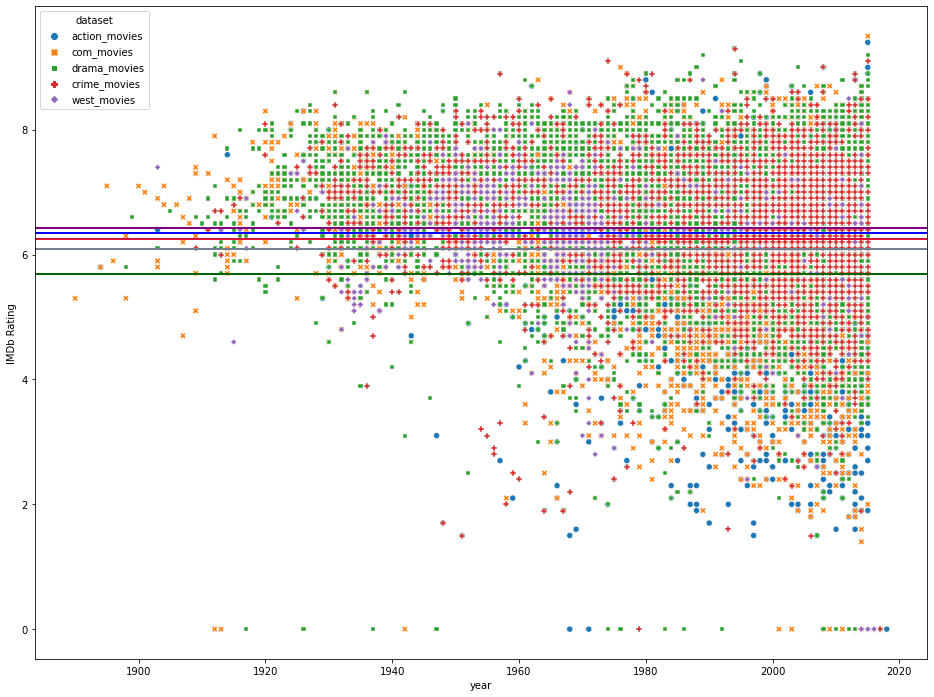

In [80]:
plt.figure(figsize=(16, 12))


conc = pd.concat([action_movies.assign(dataset='action_movies'),
                  com_movies.assign(dataset='com_movies'),
                 drama_movies.assign(dataset='drama_movies'),
                 crime_movies.assign(dataset='crime_movies'),
                 west_movies.assign(dataset='west_movies')])

sns.scatterplot(x='year', y='IMDb Rating', data=conc, hue='dataset', style='dataset', legend='full')


action_mean = action_movies['IMDb Rating'].mean()
com_mean = com_movies['IMDb Rating'].mean()
drama_mean = drama_movies['IMDb Rating'].mean()
crime_mean = crime_movies['IMDb Rating'].mean()
west_mean = west_movies['IMDb Rating'].mean()


plt.axhline(y=action_mean, linewidth=2, color='darkgreen')
act_rat = str(round(action_mean, 2))

plt.axhline(y=com_mean, linewidth=2, color='slategrey')
com_rat = str(round(com_mean, 2))

plt.axhline(y=drama_mean, linewidth=2, color='purple')
dram_rat = str(round(drama_mean, 2))

plt.axhline(y=crime_mean, linewidth=2, color='blue')
crime_rat = str(round(crime_mean, 2))

plt.axhline(y=west_mean, linewidth=2, color='crimson')
west_rat = str(round(west_mean, 2))

plt.show()

As we can see from above, on average, the genre with the highest average IMDb Rating is Drama, followed by Crime, Westerns and then Action.

In [83]:
print("Average rating of Drama movies: ", dram_rat, " / 10")
print("Average rating of Crime movies: ", crime_rat, " / 10")
print("Average rating of Western movies: ", west_rat, " / 10")
print("Average rating of Comedy movies: ", com_rat, " / 10")
print("Average rating of Action movies: ", act_rat, " / 10")

Average rating of Drama movies:  6.43  / 10
Average rating of Crime movies:  6.34  / 10
Average rating of Western movies:  6.25  / 10
Average rating of Comedy movies:  6.08  / 10
Average rating of Action movies:  5.69  / 10


### Year of Release VS Movie Runtime Plot 

This plot shows how movie runtimes have changed as time passes. The red line shows the average runtime.

In [28]:
# New dataframe with 10000 random rows

df_10k = df.sample(n=10000)

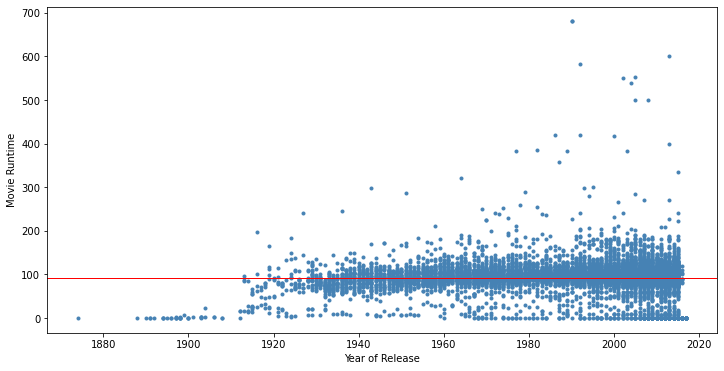

In [29]:
plt.figure(figsize=(12, 6))

plt.scatter(df_10k['year'], df_10k['runtime'], s=9, alpha=1, color='steelblue')

df_10k_mean = df_10k['runtime'].mean()

plt.axhline(y=df_10k_mean, linewidth=1, color='red')

plt.ylabel('Movie Runtime')
plt.xlabel('Year of Release')
plt.show()

# Exploration by Movie Director

## Quentin Tarantino Movies

In [30]:
# Quentin Tarantino Movies

df_QT = df.loc[df['director'] == 'Quentin Tarantino']


df_QT.loc[df_QT['IMDb Rating'] == 0.0, 'IMDb Rating'] = 7.8 


df_QT

,title,year,rating,runtime,genre,released,director,writer,cast,metacritic,IMDb Rating,imdbVotes,plot,fullplot,language,country,awards,type
15683,Reservoir Dogs,1992.0,R,99.0,"Crime, Drama",1992-09-02,Quentin Tarantino,"Quentin Tarantino, Roger Avary (background rad...","Harvey Keitel, Tim Roth, Michael Madsen, Chris...",78.0,8.4,586480.0,After a simple jewelery heist goes terribly wr...,"Six criminals, who are strangers to each other...",English,USA,12 wins & 11 nominations.,movie
16679,Pulp Fiction,1994.0,R,154.0,"Crime, Drama",1994-10-14,Quentin Tarantino,"Quentin Tarantino (story), Roger Avary (story)...","Tim Roth, Amanda Plummer, Laura Lovelace, John...",94.0,8.9,1179033.0,"The lives of two mob hit men, a boxer, a gangs...",Jules Winnfield and Vincent Vega are two hitme...,"English, Spanish, French",USA,Won 1 Oscar. Another 63 wins & 47 nominations.,movie
18325,Jackie Brown,1997.0,R,154.0,"Crime, Drama, Thriller",1997-12-25,Quentin Tarantino,"Quentin Tarantino (written for the screen by),...","Pam Grier, Samuel L. Jackson, Robert Forster, ...",64.0,7.5,217634.0,A middle-aged woman finds herself in the middl...,The middle age stewardess Jackie Brown smuggle...,English,USA,Nominated for 1 Oscar. Another 9 wins & 19 nom...,movie
23229,Kill Bill: Vol. 1,2003.0,R,111.0,Action,2003-10-10,Quentin Tarantino,"Quentin Tarantino, Quentin Tarantino (characte...","Uma Thurman, Lucy Liu, Vivica A. Fox, Daryl Ha...",69.0,8.1,650502.0,The Bride wakens from a four-year coma. The ch...,"The lead character, called 'The Bride,' was a ...","English, Japanese, French",USA,Nominated for 1 Golden Globe. Another 23 wins ...,movie
26244,Kill Bill: Vol. 2,2004.0,R,137.0,"Action, Crime, Thriller",2004-04-16,Quentin Tarantino,"Quentin Tarantino, Quentin Tarantino (characte...","Vivica A. Fox, Ambrosia Kelley, Michael Parks,...",83.0,8.0,464757.0,The Bride continues her quest of vengeance aga...,0,"English, Cantonese, Mandarin, Spanish",USA,Nominated for 2 Golden Globes. Another 19 wins...,movie
31629,Death Proof,2007.0,R,113.0,Thriller,2007-05-31,Quentin Tarantino,Quentin Tarantino,"Kurt Russell, Zo� Bell, Rosario Dawson, Vaness...",0.0,7.1,191848.0,Two separate sets of voluptuous women are stal...,"In Austin, Texas, the girlfriends Julia, Arlen...",English,USA,1 win & 5 nominations.,movie
38097,Django Unchained,2012.0,R,165.0,Western,2012-12-25,Quentin Tarantino,Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",81.0,8.5,821085.0,"With the help of a German bounty hunter, a fre...","Former dentist, Dr. King Schultz, buys the fre...","English, German, French",USA,Won 2 Oscars. Another 65 wins & 105 nominations.,movie
43525,The Hateful Eight,2015.0,0,0.0,Western,2016-01-08,Quentin Tarantino,Quentin Tarantino,"Jennifer Jason Leigh, Channing Tatum, Walton G...",0.0,7.8,0.0,"In post-Civil War Wyoming, bounty hunters try ...","In post-Civil War Wyoming, bounty hunters try ...",English,USA,0,movie


### Quentin Tarantino movie ratings over time

In [31]:
df_QT['IMDb Rating']

15683    8.4
16679    8.9
18325    7.5
23229    8.1
26244    8.0
31629    7.1
38097    8.5
43525    7.8
Name: IMDb Rating, dtype: float64

Text(0, 0.5, 'IMDb Rating')

<Figure size 648x432 with 0 Axes>

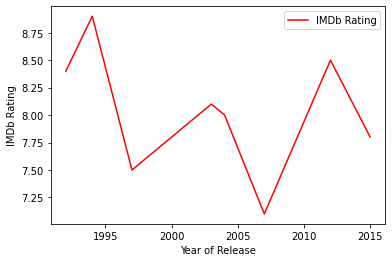

In [32]:
plt.figure(figsize=(9, 6))

# plt.scatter(df_QT['year'], df_QT['IMDb Rating'], color = 'red')

df_QT.plot(x = 'year', y = 'IMDb Rating', color = 'red')

plt.xlabel('Year of Release')
plt.ylabel('IMDb Rating')

## Christopher Nolan Movies

In [33]:
# Christopher Nolan Movies

df_CN_old = df.loc[df['director'] == 'Christopher Nolan']

df_CN_ = df_CN_old.drop([27142, 46010], 0)

df_CN = df_CN_.sort_values('year')

df_CN

,title,year,rating,runtime,genre,released,director,writer,cast,metacritic,IMDb Rating,imdbVotes,plot,fullplot,language,country,awards,type
19966,Following,1998.0,R,69.0,"Mystery, Thriller",1999-11-05,Christopher Nolan,Christopher Nolan,"Jeremy Theobald, Alex Haw, Lucy Russell, John ...",60.0,7.6,59767.0,A young writer who follows strangers for mater...,An older man listens to Bill's story about bei...,English,UK,5 wins & 4 nominations.,movie
21686,Memento,2000.0,R,113.0,"Mystery, Thriller",2001-05-25,Christopher Nolan,"Christopher Nolan (screenplay), Jonathan Nolan...","Guy Pearce, Carrie-Anne Moss, Joe Pantoliano, ...",80.0,8.5,757189.0,A man creates a strange system to help him rem...,Memento chronicles two separate stories of Leo...,English,USA,Nominated for 2 Oscars. Another 52 wins & 44 n...,movie
23561,Insomnia,2002.0,R,118.0,"Mystery, Thriller",2002-05-24,Christopher Nolan,"Hillary Seitz (screenplay), Nikolaj Frobenius,...","Al Pacino, Martin Donovan, Oliver 'Ole' Zemen,...",78.0,7.2,202616.0,Two Los Angeles homicide detectives are dispat...,Sent from the city to investigate the murder o...,English,"USA, Canada",1 win & 10 nominations.,movie
26063,Batman Begins,2005.0,PG-13,140.0,"Action, Adventure",2005-06-15,Christopher Nolan,"Bob Kane (characters), David S. Goyer (story),...","Christian Bale, Michael Caine, Liam Neeson, Ka...",70.0,8.3,860733.0,"After training with his mentor, Batman begins ...","When his parents were killed, billionaire play...","English, Urdu, Mandarin","USA, UK",Nominated for 1 Oscar. Another 21 wins & 48 no...,movie
29121,The Prestige,2006.0,PG-13,130.0,"Drama, Mystery, Thriller",2006-10-20,Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Hugh Jackman, Christian Bale, Michael Caine, P...",66.0,8.5,743761.0,Two stage magicians engage in competitive one-...,"In the end of the Nineteenth Century, in Londo...",English,"USA, UK",Nominated for 2 Oscars. Another 7 wins & 27 no...,movie
28702,The Dark Knight,2008.0,PG-13,152.0,"Action, Crime, Drama",2008-07-18,Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",82.0,9.0,1495351.0,When the menace known as the Joker wreaks havo...,Batman raises the stakes in his war on crime. ...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 142 wins & 106 nominations.,movie
34494,Inception,2010.0,PG-13,148.0,"Action, Mystery, Sci-Fi",2010-07-16,Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",74.0,8.8,1294646.0,A thief who steals corporate secrets through u...,"Dom Cobb is a skilled thief, the absolute best...","English, Japanese, French","USA, UK",Won 4 Oscars. Another 158 wins & 172 nominations.,movie
34323,The Dark Knight Rises,2012.0,PG-13,165.0,"Action, Thriller",2012-07-20,Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Gary Oldman, Tom Hardy, Joseph...",78.0,8.5,1004805.0,Eight years after the Joker's reign of anarchy...,Despite his tarnished reputation after the eve...,English,"USA, UK",Nominated for 1 BAFTA Film Award. Another 45 w...,movie
30160,Interstellar,2014.0,PG-13,169.0,"Adventure, Drama, Sci-Fi",2014-11-07,Christopher Nolan,"Jonathan Nolan, Christopher Nolan","Ellen Burstyn, Matthew McConaughey, Mackenzie ...",74.0,8.7,699518.0,A team of explorers travel through a wormhole ...,"In the near future, Earth has been devastated ...",English,"USA, UK, Canada",Won 1 Oscar. Another 44 wins & 100 nominations.,movie


### Christopher Nolan ratings over time


In [34]:
df_CN['IMDb Rating']

19966    7.6
21686    8.5
23561    7.2
26063    8.3
29121    8.5
28702    9.0
34494    8.8
34323    8.5
30160    8.7
Name: IMDb Rating, dtype: float64

<Figure size 432x288 with 0 Axes>

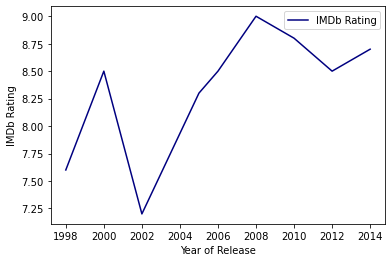

In [35]:
plt.figure()

df_CN.plot(x = 'year', y = 'IMDb Rating', color = 'navy')

plt.xlabel('Year of Release')
plt.ylabel('IMDb Rating')
plt.legend()

## Stanley Kubrick Movies

In [36]:
# Stanley Kubrick Movies

df_SK_old = df.loc[df['director'] == 'Stanley Kubrick']
df_SK_ = df_SK_old.drop([3452, 3654, 3943], 0)
df_SK = df_SK_.sort_values('year')
df_SK

,title,year,rating,runtime,genre,released,director,writer,cast,metacritic,IMDb Rating,imdbVotes,plot,fullplot,language,country,awards,type
4037,Fear and Desire,1953.0,NOT RATED,62.0,"War, Drama",1953-04-01,Stanley Kubrick,Howard Sackler,"Frank Silvera, Kenneth Harp, Paul Mazursky, St...",0.0,5.7,4315.0,Four soldiers trapped behind enemy lines must ...,A ficticious war in an unidentified country pr...,English,USA,1 nomination.,movie
4459,Killer's Kiss,1955.0,UNRATED,67.0,"Crime, Drama, Film-Noir",1955-10-01,Stanley Kubrick,Stanley Kubrick (story),"Frank Silvera, Jamie Smith, Irene Kane, Jerry ...",0.0,6.7,14558.0,As a man waits at a train station for his girl...,Prize-fighter Davy Gordon intervenes when priv...,English,USA,1 win.,movie
4667,The Killing,1956.0,APPROVED,85.0,"Crime, Film-Noir, Thriller",1956-06-06,Stanley Kubrick,"Stanley Kubrick (screenplay), Jim Thompson (di...","Sterling Hayden, Coleen Gray, Vince Edwards, J...",0.0,8.1,57284.0,Crooks plan and execute a daring race-track ro...,"After getting out of prison, Johnny Clay maste...",English,USA,0,movie
4938,Paths of Glory,1957.0,APPROVED,88.0,"Drama, War",1957-10-25,Stanley Kubrick,"Stanley Kubrick (screenplay), Calder Willingha...","Kirk Douglas, Ralph Meeker, Adolphe Menjou, Ge...",0.0,8.5,107342.0,"Based on the 1935 novel of the same name, it t...",The futility and irony of the war in the trenc...,"English, German, Latin",USA,Nominated for 1 BAFTA Film Award. Another 4 wi...,movie
5616,Spartacus,1960.0,PG-13,197.0,"Adventure, Biography, Drama",1960-10-07,Stanley Kubrick,"Dalton Trumbo (screenplay), Howard Fast (based...","Kirk Douglas, Laurence Olivier, Jean Simmons, ...",0.0,8.0,91559.0,The slave Spartacus leads a violent revolt aga...,"In 73 BCE, a Thracian slave leads a revolt at ...",English,USA,Won 4 Oscars. Another 7 wins & 9 nominations.,movie
5941,Lolita,1962.0,NOT RATED,152.0,"Drama, Romance",1962-06-12,Stanley Kubrick,"Vladimir Nabokov (screenplay), Vladimir Naboko...","James Mason, Shelley Winters, Sue Lyon, Gary C...",0.0,7.7,61638.0,A middle-aged college professor becomes infatu...,"Humbert Humbert, a divorced British professor ...","English, French","UK, USA",Nominated for 1 Oscar. Another 1 win & 7 nomin...,movie
6102,Dr. Strangelove or: How I Learned to Stop Worr...,1964.0,PG,95.0,"Comedy, War",1964-01-29,Stanley Kubrick,"Stanley Kubrick (screenplay), Terry Southern (...","Peter Sellers, George C. Scott, Sterling Hayde...",96.0,8.5,312300.0,An insane general triggers a path to nuclear h...,Paranoid Brigadier General Jack D. Ripper of B...,"English, Russian","USA, UK",Nominated for 4 Oscars. Another 15 wins & 4 no...,movie
7247,2001: A Space Odyssey,1968.0,G,160.0,"Mystery, Sci-Fi",1968-05-15,Stanley Kubrick,"Stanley Kubrick (screenplay), Arthur C. Clarke...","Keir Dullea, Gary Lockwood, William Sylvester,...",86.0,8.3,377539.0,"Humanity finds a mysterious, obviously artific...","""2001"" is a story of evolution. Sometime in th...","English, Russian","USA, UK",Won 1 Oscar. Another 14 wins & 6 nominations.,movie
8196,A Clockwork Orange,1971.0,X,136.0,"Crime, Drama, Sci-Fi",1972-02-02,Stanley Kubrick,"Stanley Kubrick (screenplay), Anthony Burgess ...","Malcolm McDowell, Patrick Magee, Michael Bates...",78.0,8.4,495745.0,"In future Britain, charismatic delinquent Alex...","Protagonist Alex DeLarge is an ""ultraviolent"" ...",English,"UK, USA",Nominated for 4 Oscars. Another 12 wins & 13 n...,movie
9492,Barry Lyndon,1975.0,PG,184.0,"Adventure, Drama, History",1975-12-18,Stanley Kubrick,"Stanley Kubrick (written for the screen by), W...","Ryan O'Neal, Marisa Berenson, Patrick Magee, H...",0.0,8.1,91117.0,An Irish rogue wins the heart of a rich widow ...,"In the Eighteenth Century, in a small village ...","English, German, French","UK, USA, Ireland",Won 4 Oscars. Another 15 wins & 11 nominations.,movie


### Stanley Kubrick ratings over time

In [37]:
df_SK['IMDb Rating']

4037     5.7
4459     6.7
4667     8.1
4938     8.5
5616     8.0
5941     7.7
6102     8.5
7247     8.3
8196     8.4
9492     8.1
11256    8.4
13478    8.3
18729    7.3
Name: IMDb Rating, dtype: float64

<Figure size 432x288 with 0 Axes>

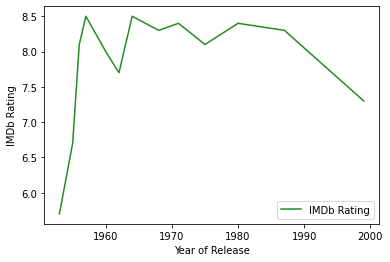

In [38]:
plt.figure()

df_SK.plot(x = 'year', y = 'IMDb Rating', color = 'forestgreen')

plt.xlabel('Year of Release')
plt.ylabel('IMDb Rating')
plt.legend()

## Martin Scorsese Movies

In [39]:
# Martin Scorsese Movies 

df_MS_old = df.loc[df['director'] == 'Martin Scorsese']

df_MS_ = df_MS_old.drop([6240, 6986, 8094, 8531, 9330, 10391, 10539, 19018, 20617, 23839, 30771, 32295, 32590, 37231], 0)

df_MS = df_MS_.sort_values('year')

df_MS.loc[df_MS['IMDb Rating'] == 0.0, 'IMDb Rating'] = 7.1

df_MS

,title,year,rating,runtime,genre,released,director,writer,cast,metacritic,IMDb Rating,imdbVotes,plot,fullplot,language,country,awards,type
7517,Who's That Knocking at My Door,1967.0,R,90.0,"Drama, Romance",1978-01-20,Martin Scorsese,"Betzi Manoogian (additional dialogue), Martin ...","Zina Bethune, Harvey Keitel, Anne Collette, Le...",0.0,6.8,5200.0,A young man struggles with the fact that his g...,J.R. is a typical Italian-American on the stre...,English,USA,1 nomination.,movie
9025,Mean Streets,1973.0,R,112.0,"Crime, Drama",1973-10-14,Martin Scorsese,"Martin Scorsese (screenplay), Mardik Martin (s...","Robert De Niro, Harvey Keitel, David Proval, A...",0.0,7.4,63075.0,A small-time hood struggles to succeed on the ...,The future is set for Tony and Michael - ownin...,"English, Italian",USA,6 wins & 4 nominations.,movie
9174,Alice Doesn't Live Here Anymore,1974.0,PG,112.0,"Drama, Romance",1975-05-30,Martin Scorsese,Robert Getchell,"Mia Bendixsen, Ellen Burstyn, Alfred Lutter II...",0.0,7.4,14297.0,A recently widowed woman is on the road with h...,Despite admitting that she was scared of him i...,English,USA,Won 1 Oscar. Another 7 wins & 9 nominations.,movie
10029,Taxi Driver,1976.0,R,113.0,"Crime, Drama",1976-02-08,Martin Scorsese,Paul Schrader,"Diahnne Abbott, Frank Adu, Victor Argo, Gino A...",93.0,8.4,449991.0,A mentally unstable Vietnam war veteran works ...,Travis Bickle is an ex-Marine and Vietnam War ...,"English, Spanish",USA,Nominated for 4 Oscars. Another 27 wins & 9 no...,movie
10260,"New York, New York",1977.0,PG,155.0,"Drama, Music, Musical",1977-06-21,Martin Scorsese,"Earl Mac Rauch (screenplay), Mardik Martin (sc...","Liza Minnelli, Robert De Niro, Lionel Stander,...",0.0,6.7,12487.0,An egotistical saxophonist and a young singer ...,"The day WWII ends, Jimmy, a selfish and smooth...",English,USA,Nominated for 4 Golden Globes. Another 2 wins ...,movie
11231,Raging Bull,1980.0,R,129.0,"Biography, Drama, Sport",1980-12-19,Martin Scorsese,"Jake LaMotta (based on the book by), Joseph Ca...","Robert De Niro, Cathy Moriarty, Joe Pesci, Fra...",92.0,8.3,213488.0,An emotionally self-destructive boxer's journe...,When Jake LaMotta steps into a boxing ring and...,English,USA,Won 2 Oscars. Another 27 wins & 19 nominations.,movie
12102,The King of Comedy,1982.0,PG,109.0,"Comedy, Drama",1982-12-18,Martin Scorsese,Paul D. Zimmerman,"Robert De Niro, Jerry Lewis, Diahnne Abbott, S...",0.0,7.8,46925.0,Aspiring comic Rupert Pupkin wants to achieve ...,Rupert Pupkin is obsessed with becoming a come...,English,USA,Won 1 BAFTA Film Award. Another 2 wins & 6 nom...,movie
12633,After Hours,1985.0,R,97.0,"Comedy, Crime, Drama",1985-10-11,Martin Scorsese,Joseph Minion,"Griffin Dunne, Rosanna Arquette, Verna Bloom, ...",90.0,7.7,35796.0,An ordinary word processor has the worst night...,A meek word processor impulsively travels to M...,English,USA,Nominated for 1 Golden Globe. Another 4 wins &...,movie
13055,The Color of Money,1986.0,R,119.0,"Drama, Sport",1986-10-17,Martin Scorsese,"Walter Tevis (novel), Richard Price (screenplay)","Paul Newman, Tom Cruise, Mary Elizabeth Mastra...",0.0,7.0,53699.0,Fast Eddie Felson teaches a cocky but immensel...,Pool hustler Fast Eddie Felson finds the young...,"English, Spanish",USA,Won 1 Oscar. Another 4 wins & 6 nominations.,movie
13979,The Last Temptation of Christ,1988.0,R,164.0,Drama,1988-09-22,Martin Scorsese,"Nikos Kazantzakis (novel), Paul Schrader (scre...","Willem Dafoe, Harvey Keitel, Paul Greco, Steve...",80.0,7.6,37063.0,"The life of Jesus Christ, his journey through ...","The carpenter, Jesus of Nazareth, tormented by...",English,"USA, Canada",Nominated for 1 Oscar. Another 3 wins & 5 nomi...,movie


### Martin Scorsese ratings over time

In [40]:
df_MS['IMDb Rating']

7517     6.8
9025     7.4
9174     7.4
10029    8.4
10260    6.7
11231    8.3
12102    7.8
12633    7.7
13055    7.0
13979    7.6
14737    8.7
15054    7.3
15818    7.2
16919    8.2
18354    7.0
20273    6.8
21926    7.5
25241    7.5
27060    8.5
32415    8.1
31208    7.6
31380    8.2
29321    7.1
Name: IMDb Rating, dtype: float64

<Figure size 432x288 with 0 Axes>

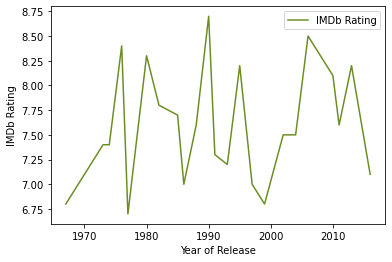

In [41]:
plt.figure()

df_MS.plot(x = 'year', y = 'IMDb Rating', color = 'olivedrab')

plt.xlabel('Year of Release')
plt.ylabel('IMDb Rating')
plt.legend()

## Wes Anderson Movies

In [42]:
# Wes Anderson Movies 

df_WA_old = df.loc[df['director'] == 'Wes Anderson']
df_WA_ = df_WA_old.drop([41008, 32175], 0)
df_WA = df_WA_.sort_values('year')
df_WA

,title,year,rating,runtime,genre,released,director,writer,cast,metacritic,IMDb Rating,imdbVotes,plot,fullplot,language,country,awards,type
17503,Bottle Rocket,1996.0,R,91.0,"Comedy, Crime, Drama",1996-02-21,Wes Anderson,"Owen Wilson, Wes Anderson","Luke Wilson, Owen Wilson, Ned Dowd, Shea Fowler",65.0,7.1,50270.0,Focusing on a trio of friends and their elabor...,Upon his release from a mental hospital follow...,"English, Spanish",USA,2 wins.,movie
19181,Rushmore,1998.0,R,93.0,"Comedy, Drama",1999-02-19,Wes Anderson,"Wes Anderson, Owen Wilson","Jason Schwartzman, Bill Murray, Olivia William...",86.0,7.7,124741.0,The extracurricular king of Rushmore preparato...,Max Fischer is a precocious 15-year-old whose ...,"English, Spanish, Latin, French",USA,Nominated for 1 Golden Globe. Another 17 wins ...,movie
23201,The Royal Tenenbaums,2001.0,R,110.0,"Comedy, Drama",2002-01-04,Wes Anderson,"Wes Anderson, Owen Wilson","Gene Hackman, Anjelica Huston, Ben Stiller, Gw...",75.0,7.6,193424.0,An estranged family of former child prodigies ...,"Three grown prodigies, all with a unique geniu...","English, Italian",USA,Nominated for 1 Oscar. Another 11 wins & 39 no...,movie
25737,The Life Aquatic with Steve Zissou,2004.0,R,119.0,"Adventure, Comedy, Drama",2004-12-25,Wes Anderson,"Wes Anderson, Noah Baumbach","Bill Murray, Owen Wilson, Cate Blanchett, Anje...",62.0,7.3,128645.0,With a plan to exact revenge on a mythical sha...,When his partner is killed by the mysterious a...,"English, Icelandic, Filipino, Portuguese, Fren...",USA,4 wins & 9 nominations.,movie
30350,The Darjeeling Limited,2007.0,R,91.0,"Adventure, Comedy, Drama",2007-10-26,Wes Anderson,"Wes Anderson, Roman Coppola, Jason Schwartzman","Owen Wilson, Adrien Brody, Jason Schwartzman, ...",67.0,7.2,126132.0,"A year after their father's funeral, three bro...",A year after the accidental death of their fat...,"English, Hindi, German, Tibetan",USA,3 wins & 3 nominations.,movie
27749,Fantastic Mr. Fox,2009.0,PG,87.0,"Animation, Adventure, Comedy",2009-11-25,Wes Anderson,"Roald Dahl (novel), Wes Anderson (screenplay),...","George Clooney, Meryl Streep, Jason Schwartzma...",83.0,7.8,124101.0,An urbane fox cannot resist returning to his f...,It is the story of one Mr. Fox and his wild-wa...,"English, French",USA,Nominated for 2 Oscars. Another 47 wins & 35 n...,movie
37324,Moonrise Kingdom,2012.0,PG-13,94.0,"Adventure, Comedy, Drama",2012-06-29,Wes Anderson,"Wes Anderson, Roman Coppola","Bruce Willis, Edward Norton, Bill Murray, Fran...",84.0,7.8,215005.0,A pair of young lovers flee their New England ...,Set on an island off the coast of New England ...,English,USA,Nominated for 1 Oscar. Another 49 wins & 99 no...,movie
40203,The Grand Budapest Hotel,2014.0,R,99.0,"Adventure, Comedy, Drama",2014-03-28,Wes Anderson,"Stefan Zweig (inspired by the writings of), We...","Ralph Fiennes, F. Murray Abraham, Mathieu Amal...",88.0,8.1,382211.0,"The adventures of Gustave H, a legendary conci...",GRAND BUDAPEST HOTEL recounts the adventures o...,"English, French","USA, Germany, UK",Won 4 Oscars. Another 142 wins & 155 nominations.,movie


### Wes Anderson rankings over time

In [43]:
df_WA['IMDb Rating']

17503    7.1
19181    7.7
23201    7.6
25737    7.3
30350    7.2
27749    7.8
37324    7.8
40203    8.1
Name: IMDb Rating, dtype: float64

<Figure size 432x288 with 0 Axes>

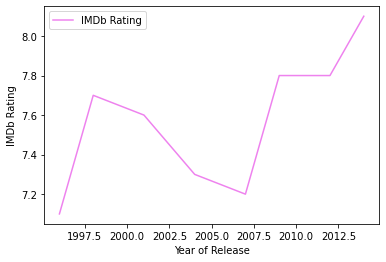

In [44]:
plt.figure()

df_WA.plot(x = 'year', y = 'IMDb Rating', color = 'violet')

plt.xlabel('Year of Release')
plt.ylabel('IMDb Rating')
plt.legend()

# Exploration by Actor

### Leonardo DiCaprio Movies

In [45]:
# Leonardo DiCaprio Movies

df_LDC = df.loc[df.cast.str.contains("Leonardo DiCaprio", na=False)]
df_LDC = df_LDC.sort_values('year')

df_LDC = df_LDC.drop([36629], 0)
df_LDC.loc[df_LDC['IMDb Rating'] == 0.0, 'IMDb Rating'] = 8.0
df_LDC.loc[df_LDC['runtime'] == 0.0, 'runtime'] = 156.0

df_LDC

,title,year,rating,runtime,genre,released,director,writer,cast,metacritic,IMDb Rating,imdbVotes,plot,fullplot,language,country,awards,type
16230,This Boy's Life,1993.0,R,115.0,"Biography, Drama",1993-04-23,Michael Caton-Jones,"Tobias Wolff (book), Robert Getchell (screenplay)","Robert De Niro, Ellen Barkin, Leonardo DiCapri...",60.0,7.3,31684.0,The story about the relationship between a reb...,"In 1957, a son and mother flee the East and an...",English,USA,4 wins.,movie
16267,What's Eating Gilbert Grape,1993.0,PG-13,118.0,Drama,1994-03-04,Lasse Hallstr�m,"Peter Hedges (novel), Peter Hedges (screenplay)","Johnny Depp, Leonardo DiCaprio, Juliette Lewis...",0.0,7.8,157169.0,Gilbert has to care for his brother Arnie and ...,What's Eating Gibert Grape is a beautifully sh...,English,USA,Nominated for 1 Oscar. Another 7 wins & 1 nomi...,movie
16459,The Foot Shooting Party,1994.0,0,27.0,Short,0,Annette Haywood-Carter,Ken Carter,"Jake Busey, Leonardo DiCaprio, Bradley Gregg, ...",0.0,4.8,181.0,The lead singer of a band gets drafted for war...,The lead singer of a band gets drafted for war...,English,USA,0,movie
16875,The Basketball Diaries,1995.0,R,102.0,"Biography, Crime, Drama",1995-04-21,Scott Kalvert,"Jim Carroll (novel), Bryan Goluboff (screenplay)","Leonardo DiCaprio, Lorraine Bracco, Marilyn So...",46.0,7.3,73277.0,Film adaptation of street tough Jim Carroll's ...,Film adaptation of street tough Jim Carroll's ...,English,USA,0,movie
17277,The Quick and the Dead,1995.0,R,107.0,"Action, Thriller, Western",1995-02-10,Sam Raimi,Simon Moore,"Sharon Stone, Gene Hackman, Russell Crowe, Leo...",49.0,6.4,64107.0,Lady avenger returns to western town owned by ...,"Ellen, an unknown female gunslinger rides into...","English, Spanish","Japan, USA",1 nomination.,movie
17368,Total Eclipse,1995.0,R,111.0,"Biography, Drama, Romance",1995-11-03,Agnieszka Holland,Christopher Hampton (screenplay),"Leonardo DiCaprio, David Thewlis, Romane Bohri...",0.0,6.5,9432.0,"Young, wild poet Arthur Rimbaud and his mentor...","In 1871, Paul Verlaine (1844-1896), an establi...",English,"UK, France, Belgium",1 nomination.,movie
17784,Marvin's Room,1996.0,PG-13,98.0,Drama,1997-02-08,Jerry Zaks,"Scott McPherson (play), Scott McPherson (scree...","Meryl Streep, Leonardo DiCaprio, Diane Keaton,...",68.0,6.7,18263.0,A leukemia patient attempts to end a 20-year f...,Estranged since their father's first stroke so...,English,USA,Nominated for 1 Oscar. Another 5 wins & 11 nom...,movie
17898,Romeo + Juliet,1996.0,PG-13,120.0,"Drama, Romance",1996-11-01,Baz Luhrmann,"William Shakespeare (play), Craig Pearce (scre...","Leonardo DiCaprio, Claire Danes, John Leguizam...",60.0,6.8,154335.0,Shakespeare's famous play is updated to the hi...,"Classic story of Romeo and Juliet, set in a mo...",English,USA,Nominated for 1 Oscar. Another 15 wins & 25 no...,movie
18609,Titanic,1997.0,PG-13,194.0,"Drama, Romance",1997-12-19,James Cameron,James Cameron,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",74.0,7.7,716392.0,A seventeen-year-old aristocrat falls in love ...,"84 years later, a 101-year-old woman named Ros...","English, French, German, Swedish, Italian, Rus...",USA,Won 11 Oscars. Another 116 wins & 63 nominations.,movie
18771,The Man in the Iron Mask,1998.0,PG-13,132.0,"Action, Adventure",1998-03-13,Randall Wallace,"Alexandre Dumas p�re (novels), Randall Wallace...","Leonardo DiCaprio, Jeremy Irons, John Malkovic...",48.0,6.4,114798.0,The cruel King Louis XIV of France has a secre...,"Paris is starving, but the King of France is m...","English, Italian","USA, France",3 wins & 3 nominations.,movie


#### Leonardo DiCaprio Movies Average Runtime

<Figure size 432x288 with 0 Axes>

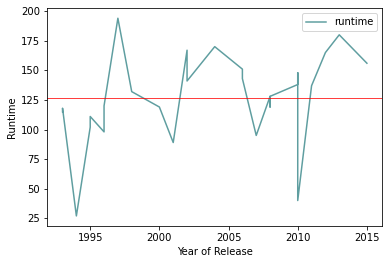

The red line shows the average runtime of Leonardo DiCaprio movies
Average movie runtime:  126.36 minutes


In [46]:
plt.figure()

df_LDC.plot(x = 'year', y = 'runtime', color = 'cadetblue')

df_LDC_run_mean = df_LDC['runtime'].mean()
df_LDC_run_mean_rounded = str(round(df_LDC_run_mean, 2))

plt.axhline(y=df_LDC_run_mean, linewidth=0.75, color='red')

plt.xlabel('Year of Release')
plt.ylabel('Runtime')

plt.show()


print("The red line shows the average runtime of Leonardo DiCaprio movies")
print("Average movie runtime: ", df_LDC_run_mean_rounded, "minutes")

#### Leonardo DiCaprio Movies Average Ratings

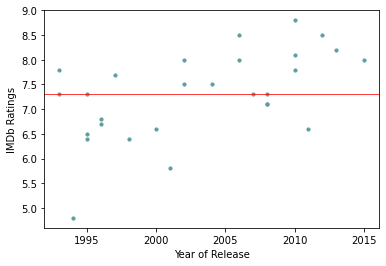

The red line shows the average IMDb Rating of Leonardo DiCaprio movies
Average IMDb Rating:  7.3 / 10


In [47]:
plt.figure()

plt.scatter(df_LDC['year'], df_LDC['IMDb Rating'], s=10, alpha=1, color='cadetblue')

df_LDC_mean = df_LDC['IMDb Rating'].mean()
df_LDC_rat_mean_rounded = str(round(df_LDC_mean, 2))


plt.axhline(y=df_LDC_mean, linewidth=0.75, color='red')

plt.ylabel('IMDb Ratings')
plt.xlabel('Year of Release')

plt.show()


print("The red line shows the average IMDb Rating of Leonardo DiCaprio movies")
print("Average IMDb Rating: ", df_LDC_rat_mean_rounded, "/ 10")

In [48]:
# Leonardo DiCaprio highest ranked movie 

df_LDC[df_LDC['IMDb Rating']==df_LDC['IMDb Rating'].max()]

,title,year,rating,runtime,genre,released,director,writer,cast,metacritic,IMDb Rating,imdbVotes,plot,fullplot,language,country,awards,type
34494,Inception,2010.0,PG-13,148.0,"Action, Mystery, Sci-Fi",2010-07-16,Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",74.0,8.8,1294646.0,A thief who steals corporate secrets through u...,"Dom Cobb is a skilled thief, the absolute best...","English, Japanese, French","USA, UK",Won 4 Oscars. Another 158 wins & 172 nominations.,movie


As we can see from above, Leonardo Dicaprio's films have an average runtime of 126.36 minutes and the average IMDb Ranking is 7.3 / 10. 

Leonardo DiCaprio's highest ranked movie is the 2010 Christopher Nolan film Inception, with a runtime of 148 minutes and a rating of 8.8 / 10. 

### Brad Pitt Movies

In [49]:
# Brad Pitt Movies

df_BP = df.loc[df.cast.str.contains("Brad Pitt", na=False)]
df_BP = df_BP.sort_values('year')


df_BP = df_BP.drop([44167, 36089, 38535, 43999], 0)


df_BP.loc[df_BP['IMDb Rating'] == 0.0, 'IMDb Rating'] = 7.8
df_BP.loc[df_BP['runtime'] == 0.0, 'runtime'] = 130.0


df_BP

,title,year,rating,runtime,genre,released,director,writer,cast,metacritic,IMDb Rating,imdbVotes,plot,fullplot,language,country,awards,type
18201,The Dark Side of the Sun,1988.0,R,101.0,"Drama, Romance",1988-12-21,Bozidar 'Bota' Nikolic,"Zeljko Mijanovic (screenplay), Andrew Horton (...","Guy Boyd, Brad Pitt, Cheryl Pollak, Constantin...",0.0,5.5,2629.0,Traveling in search of a cure for a rare skin ...,Traveling in search of a cure for a rare skin ...,English,"USA, Canada, Federal Republic of Yugoslavia",0,movie
14256,Cutting Class,1989.0,R,91.0,"Comedy, Crime, Horror",1992-02-07,Rospo Pallenberg,Steve Slavkin,"Donovan Leitch Jr., Jill Schoelen, Brad Pitt, ...",0.0,4.1,3105.0,A murderer is loose in a high school in this '...,High school student Paula Carson's affections ...,English,USA,0,movie
14948,Too Young to Die?,1990.0,R,92.0,"Drama, Crime",1990-02-26,Robert Markowitz,"David Hill (story), David Hill (teleplay), Geo...","Michael Tucker, Juliette Lewis, Brad Pitt, Ala...",0.0,5.9,2824.0,An abused 15 year old is charged with a murder...,An abused 15 year old is charged with a murder...,English,USA,0,movie
14999,Across the Tracks,1990.0,R,100.0,"Drama, Sport",1991-02-15,Sandy Tung,Sandy Tung,"Ricky Schroder, Brad Pitt, Carrie Snodgress, D...",0.0,5.7,1720.0,When Billy returns from reform school he has t...,When Billy returns from reform school he has t...,English,USA,0,movie
15567,Johnny Suede,1991.0,R,97.0,"Comedy, Music, Romance",1992-04-22,Tom DiCillo,Tom DiCillo,"Brad Pitt, Richard Boes, Cheryl Costa, Michael...",53.0,5.8,2832.0,A struggling young musician and devoted fan of...,A struggling young musician and devoted fan of...,English,"France, USA, Switzerland",1 win & 3 nominations.,movie
15462,Cool World,1992.0,PG-13,102.0,"Animation, Comedy, Fantasy",1992-07-10,Ralph Bakshi,"Michael Grais, Mark Victor","Kim Basinger, Gabriel Byrne, Brad Pitt, Michel...",28.0,4.7,15758.0,A comic strip vamp seeks to seduce her cartoon...,Jack Deebs is a cartoonist who is due to be re...,English,USA,2 nominations.,movie
15688,A River Runs Through It,1992.0,PG,123.0,Drama,1992-10-30,Robert Redford,"Norman Maclean (story), Richard Friedenberg (s...","Craig Sheffer, Brad Pitt, Tom Skerritt, Brenda...",68.0,7.3,38542.0,The story about two sons of a stern minister -...,The true story about two boys growing up in ru...,English,USA,Won 1 Oscar. Another 4 wins & 6 nominations.,movie
16030,Kalifornia,1993.0,R,117.0,"Crime, Thriller",1993-09-03,Dominic Sena,"Stephen Levy (story), Tim Metcalfe (story), Ti...","Brad Pitt, Kathy Larson, David Milford, David ...",49.0,6.7,39815.0,A journalist duo go on a tour of serial killer...,"Brian Kessler, a journalist researching serial...",English,USA,4 wins & 4 nominations.,movie
16567,Legends of the Fall,1994.0,R,133.0,"Drama, Romance, War",1995-01-13,Edward Zwick,"Susan Shilliday (screenplay), William D. Wittl...","Brad Pitt, Anthony Hopkins, Aidan Quinn, Julia...",45.0,7.5,102882.0,Epic tale of three brothers and their father l...,Set in the Rocky Mountains of Montana in the e...,"English, Cornish",USA,Won 1 Oscar. Another 1 win & 8 nominations.,movie
16535,Interview with the Vampire: The Vampire Chroni...,1994.0,R,123.0,"Drama, Fantasy, Horror",1994-11-11,Neil Jordan,"Anne Rice (screenplay), Anne Rice (novel)","Brad Pitt, Christian Slater, Virginia McCollam...",59.0,7.6,223700.0,"A vampire tells his epic life story: love, bet...",It hasn't even been a year since a plantation ...,"English, French",USA,Nominated for 2 Oscars. Another 20 wins & 18 n...,movie


#### Brad Pitt Movie Runtimes

<Figure size 432x288 with 0 Axes>

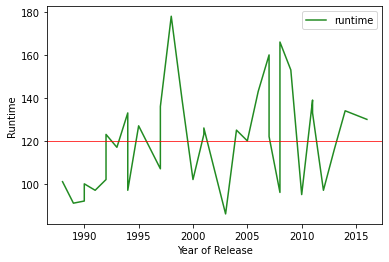

The red line shows the average runtime of Brad Pitt movies
Average movie runtime:  120.17 minutes


In [50]:
plt.figure()

df_BP.plot(x = 'year', y = 'runtime', color = 'forestgreen')

df_BP_run_mean = df_BP['runtime'].mean()
df_BP_run_mean_rounded = str(round(df_BP_run_mean, 2))

plt.axhline(y=df_BP_run_mean, linewidth=0.75, color='red')

plt.xlabel('Year of Release')
plt.ylabel('Runtime')

plt.show()


print("The red line shows the average runtime of Brad Pitt movies")
print("Average movie runtime: ", df_BP_run_mean_rounded, "minutes")

#### Brad Pitt Average Movie Ratings

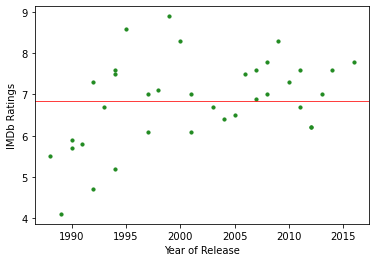

The red line shows the average IMDb Rating of Brad Pitt movies
Average IMDb Rating:  6.84 / 10


In [51]:
plt.figure()

plt.scatter(df_BP['year'], df_BP['IMDb Rating'], s=10, alpha=1, color='forestgreen')

df_BP_mean = df_BP['IMDb Rating'].mean()
df_BP_rat_mean_rounded = str(round(df_BP_mean, 2))


plt.axhline(y=df_BP_mean, linewidth=0.75, color='red')

plt.ylabel('IMDb Ratings')
plt.xlabel('Year of Release')

plt.show()


print("The red line shows the average IMDb Rating of Brad Pitt movies")
print("Average IMDb Rating: ", df_BP_rat_mean_rounded, "/ 10")

#### Brad Pitt Highest Ranked Movie

In [52]:
df_BP[df_BP['IMDb Rating']==df_BP['IMDb Rating'].max()]

,title,year,rating,runtime,genre,released,director,writer,cast,metacritic,IMDb Rating,imdbVotes,plot,fullplot,language,country,awards,type
19482,Fight Club,1999.0,R,139.0,Drama,1999-10-15,David Fincher,"Chuck Palahniuk (novel), Jim Uhls (screenplay)","Edward Norton, Brad Pitt, Helena Bonham Carter...",66.0,8.9,1191784.0,"An insomniac office worker, looking for a way ...",A ticking-time-bomb insomniac and a slippery s...,English,"USA, Germany",Nominated for 1 Oscar. Another 10 wins & 22 no...,movie


As we can see from above, Brad Pitts's films have an average runtime of 120.17 minutes and the average IMDb Ranking is 6.84 / 10. 

Brad Pitt's highest ranked movie is the 1999 David Fincher film 'Fight Club', with a runtime of 139 minutes and a rating of 8.9 / 10. 

### Samuel L. Jackson Movies

In [53]:
# Samuel L. Jackson Movies


df_SLJ = df.loc[df.cast.str.contains("Samuel L. Jackson", na=False)]


# Pulp Fiction add
plp_fct = df.loc[df.title.str.contains("Pulp Fiction", na=False)]
df_SLJ = pd.concat([df_SLJ, plp_fct])


df_SLJ = df_SLJ.sort_values('year')


df_SLJ = df_SLJ.drop([45559, 38486, 30943, 29690], 0)


df_SLJ.loc[df_SLJ['IMDb Rating'] == 0.0, 'IMDb Rating'] = 7.8
df_SLJ.loc[df_SLJ['runtime'] == 0.0, 'runtime'] = 187.0


df_SLJ

,title,year,rating,runtime,genre,released,director,writer,cast,metacritic,IMDb Rating,imdbVotes,plot,fullplot,language,country,awards,type
15787,White Sands,1992.0,R,101.0,"Action, Crime, Drama",1992-04-24,Roger Donaldson,Daniel Pyne,"Willem Dafoe, Mary Elizabeth Mastrantonio, Mic...",0.0,6.0,5292.0,A small southwestern town sheriff finds a body...,A small southwestern town sheriff finds a body...,English,USA,0,movie
15825,Amos & Andrew,1993.0,PG-13,96.0,"Comedy, Crime",1993-03-05,E. Max Frye,E. Max Frye,"Samuel L. Jackson, Michael Lerner, Margaret Co...",0.0,5.5,7020.0,"When Andrew Sterling, a successful black urban...","When Andrew Sterling, a successful black urban...","English, Spanish",USA,0,movie
16095,Loaded Weapon 1,1993.0,PG-13,84.0,"Action, Comedy, Crime",1993-02-05,Gene Quintano,"Don Holley (story), Tori Tellem (story), Don H...","Emilio Estevez, Samuel L. Jackson, Jon Lovitz,...",0.0,6.1,35733.0,An LA detective is murdered because she has mi...,An LA detective is murdered because she has mi...,English,USA,0,movie
21703,Assault at West Point: The Court-Martial of Jo...,1994.0,PG-13,98.0,"Drama, Thriller",1994-02-27,Harry Moses,Harry Moses,"Samuel L. Jackson, Sam Waterston, Mason Adams,...",0.0,6.4,412.0,"The story of Johnson Whittaker, one of the fir...","The story of Johnson Whittaker, one of the fir...",English,USA,0,movie
16679,Pulp Fiction,1994.0,R,154.0,"Crime, Drama",1994-10-14,Quentin Tarantino,"Quentin Tarantino (story), Roger Avary (story)...","Tim Roth, Amanda Plummer, Laura Lovelace, John...",94.0,8.9,1179033.0,"The lives of two mob hit men, a boxer, a gangs...",Jules Winnfield and Vincent Vega are two hitme...,"English, Spanish, French",USA,Won 1 Oscar. Another 63 wins & 47 nominations.,movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37992,Captain America: The Winter Soldier,2014.0,PG-13,136.0,"Action, Adventure, Sci-Fi",2014-04-04,"Anthony Russo, Joe Russo","Christopher Markus (screenplay), Stephen McFee...","Chris Evans, Samuel L. Jackson, Scarlett Johan...",70.0,7.8,398260.0,As Steve Rogers struggles to embrace his role ...,"For Steve Rogers, awakening after decades of s...",English,USA,Nominated for 1 Oscar. Another 5 wins & 46 nom...,movie
39215,Big Game,2014.0,PG-13,110.0,"Action, Adventure",2015-06-26,Jalmari Helander,Jalmari Helander,"Samuel L. Jackson, Onni Tommila, Ray Stevenson...",53.0,5.5,12282.0,A young teenager camping in the woods helps re...,When Air Force One is shot down by terrorists ...,"English, Finnish","Finland, UK, Germany",1 win.,movie
40355,Reasonable Doubt,2014.0,R,91.0,"Crime, Thriller",2014-01-17,Peter Howitt,Peter A. Dowling,"Dominic Cooper, Samuel L. Jackson, Gloria Reub...",19.0,5.7,11874.0,A District Attorney has his life turned upside...,"Up-and-coming District Attorney, Mitch Brockto...",English,"Germany, Canada, USA",0,movie
37211,Barely Lethal,2015.0,PG-13,96.0,"Action, Adventure, Comedy",2015-04-30,Kyle Newman,John D'Arco,"Jaime King, Samuel L. Jackson, Madeleine Stack...",44.0,5.3,6016.0,"A teenage special ops agent coveting a ""normal...",Megan Walsh has been training to be an interna...,English,USA,0,movie


#### Samuel L. Jackson Movie Runtimes

<Figure size 432x288 with 0 Axes>

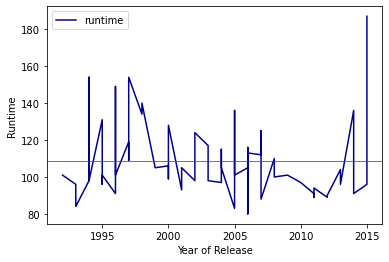

The red line shows the average runtime of Samuel L. Jackson movies
Average movie runtime:  108.86 minutes


In [54]:
plt.figure()

df_SLJ.plot(x = 'year', y = 'runtime', color = 'darkblue')

df_SLJ_run_mean = df_SLJ['runtime'].mean()
df_SLJ_run_mean_rounded = str(round(df_SLJ_run_mean, 2))

plt.axhline(y=df_SLJ_run_mean, linewidth=0.75, color='red')

plt.xlabel('Year of Release')
plt.ylabel('Runtime')

plt.show()


print("The red line shows the average runtime of Samuel L. Jackson movies")
print("Average movie runtime: ", df_SLJ_run_mean_rounded, "minutes")

#### Samuel L. Jackson Movie Ratings

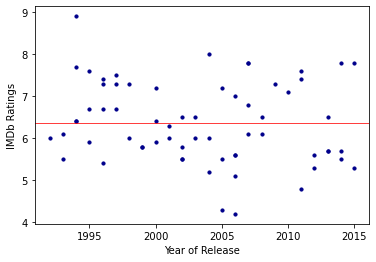

The red line shows the average IMDb Rating of Samuel L. Jackson movies.
Average IMDb Rating:  6.37 / 10


In [55]:
plt.figure()

plt.scatter(df_SLJ['year'], df_SLJ['IMDb Rating'], s=10, alpha=1, color='darkblue')

df_SLJ_mean = df_SLJ['IMDb Rating'].mean()
df_SLJ_rat_mean_rounded = str(round(df_SLJ_mean, 2))


plt.axhline(y=df_SLJ_mean, linewidth=0.75, color='red')

plt.ylabel('IMDb Ratings')
plt.xlabel('Year of Release')

plt.show()


print("The red line shows the average IMDb Rating of Samuel L. Jackson movies.")
print("Average IMDb Rating: ", df_SLJ_rat_mean_rounded, "/ 10")

#### Samuel L. Jackson Highest Rated Movie

In [56]:
# Brad Pitt highest ranked movie 

df_SLJ[df_SLJ['IMDb Rating']==df_SLJ['IMDb Rating'].max()]

,title,year,rating,runtime,genre,released,director,writer,cast,metacritic,IMDb Rating,imdbVotes,plot,fullplot,language,country,awards,type
16679,Pulp Fiction,1994.0,R,154.0,"Crime, Drama",1994-10-14,Quentin Tarantino,"Quentin Tarantino (story), Roger Avary (story)...","Tim Roth, Amanda Plummer, Laura Lovelace, John...",94.0,8.9,1179033.0,"The lives of two mob hit men, a boxer, a gangs...",Jules Winnfield and Vincent Vega are two hitme...,"English, Spanish, French",USA,Won 1 Oscar. Another 63 wins & 47 nominations.,movie


As we can see from above, Samuel L. Jackson's films have an average runtime of 120.17 minutes and the average IMDb Ranking is 6.37 / 10. 

Samuel L Jackson's highest ranked movie is the 1994 Quentin Tarantino film 'Pulp Fiction', with a runtime of 154 minutes and a rating of 8.9 / 10. 

# Linear Regression

In [57]:
import statsmodels.formula.api as smf

# 3500 Row Sample 

df_lr = df.sample(n=3500)

### Year VS Runtime

<AxesSubplot:xlabel='year', ylabel='runtime'>

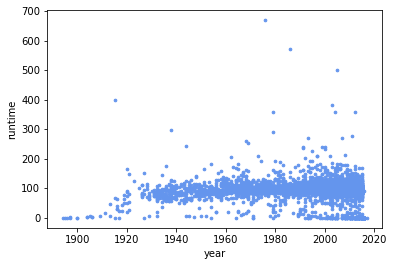

In [58]:
df_lr.plot.scatter(x='year', y='runtime', s=7, color='cornflowerblue')

In [59]:
model = smf.ols(data=df_lr, formula="runtime ~ year")

result = model.fit()

In [60]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                runtime   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Tue, 12 Jul 2022   Prob (F-statistic):              0.668
Time:                        16:12:17   Log-Likelihood:                -17746.
No. Observations:                3491   AIC:                         3.550e+04
Df Residuals:                    3489   BIC:                         3.551e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    115.3697     54.564      2.114      0.035       8.390     222.350
year          -0.0117      0.027     -0.428      0.668      -0.065       0.042
==============================================================================
Omnibus:                     2008.992   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           121499.340
Skew:                           1.969   Prob(JB):                         0.00
Kurtosis:                      31.632   Cond. No.                     1.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Year VS Rating

In [61]:
# Sample dataframe
new_df = df.sample(n=3500)

In [62]:
# Initial settings for new column
conditions = [(new_df['IMDb Rating'] >= 7.8), (new_df['IMDb Rating'] < 7.8)]
values = [1, 0]

# Dataframe with new column for good/bad
new_df['Perception'] = np.select(conditions, values)

In [63]:
# Replace NaN years with the mean of the column

new_df = new_df.fillna(new_df.mean())

In [64]:
X = new_df['year'].values.reshape(-1, 1)
print(X.shape)
y = new_df['Perception']

(3500, 1)


In [65]:
from sklearn import linear_model

model2 = linear_model.LogisticRegression()
model2.fit(X, y)

LogisticRegression()

In [66]:
# Example prediction

Xnew = np.arange(1, 1994).reshape(-1,1)

model2.predict(Xnew)

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
# Probabilities

beta_0 = model2.intercept_[0]
print(beta_0)

beta_1 = model2.coef_[0][0]
print(beta_1)

-6.193684596402424e-07
-0.0012392682450002286


In [68]:
model2.predict([[4]])

array([0])

In [69]:
# Probability of Xnew

model2.predict_proba(Xnew)

array([[0.50030997, 0.49969003],
       [0.50061979, 0.49938021],
       [0.5009296 , 0.4990704 ],
       ...,
       [0.92182343, 0.07817657],
       [0.92191269, 0.07808731],
       [0.92200186, 0.07799814]])

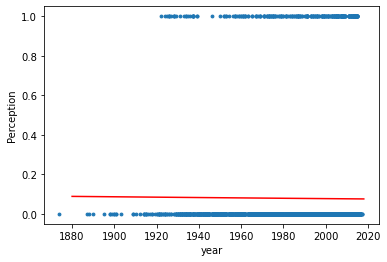

In [70]:
data = new_df[['year', 'Perception']]
data.plot.scatter('year', 'Perception', s=8)

# Plot of predicted probability:
plt.plot(np.arange(1880, 2020, 2), model2.predict_proba(np.arange(1880, 2020, 2).reshape(-1, 1))[:, 1], color='red');

In [71]:
# Accuracy of model

model2.score(X, y)

0.9217142857142857

## Testing the Model with More Features

#### IMDb Rating and IMDb Votes

<AxesSubplot:xlabel='IMDb Rating', ylabel='imdbVotes'>

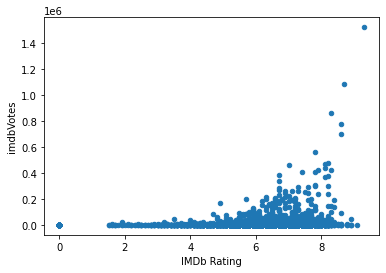

In [72]:
new_df.plot.scatter('IMDb Rating', 'imdbVotes')

In [73]:
X2 = new_df[['imdbVotes', 'IMDb Rating']]

new_model = linear_model.LogisticRegression()
new_model.fit(X2, y)
new_model.score(X2, y)

0.924

In [74]:
coef_freq = new_model.coef_[0][0]
coef_freq

6.871845692804161e-06

In [75]:
coef_time = new_model.coef_[0][1]
coef_time

-0.3491005134670371

In [76]:
new_inter = new_model.intercept_[0]
new_inter

-0.06110255126531195